In [2]:
import matplotlib.pyplot as p 
import seaborn
import pandas as pd
data=pd.read_csv('diabetes.csv')
d=pd.DataFrame(data)
d
s=d.head()
s
#d.shape
#seaborn.countplot(d['Outcome'],label='Count')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
d.shape

(768, 9)

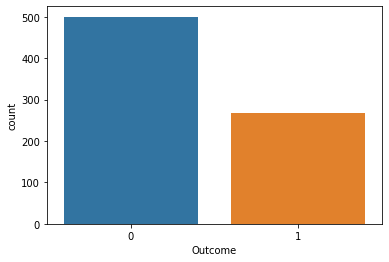

In [4]:
seaborn.countplot(d['Outcome'],label='Count')

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2
[1.0, 0.8355048859934854, 0.8403908794788274, 0.7964169381107492, 0.7882736156351792, 0.7719869706840391, 0.7703583061889251, 0.7785016286644951, 0.7850162866449512, 0.7752442996742671]
[0.7142857142857143, 0.7727272727272727, 0.7337662337662337, 0.7792207792207793, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7922077922077922, 0.7857142857142857, 0.7532467532467533]
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.79


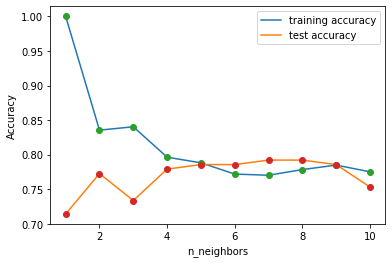

In [5]:
from sklearn.model_selection import train_test_split as t
from sklearn.neighbors import KNeighborsClassifier as k 
x_train, x_test, y_train, y_test =t(d.loc[:,d.columns!='Outcome'],d['Outcome'],stratify=d['Outcome'],test_size=0.2,random_state=0)
#print(len(d))
print(len(t(d.loc[:,d.columns!='Outcome'])))
#print(len(x_train))
#print(len(y_train))
#print(len(x_test))
#print(len(y_test))
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors in range(1,11):
    knn=k(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #trainning accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #testing accuracy
    test_accuracy.append(knn.score(x_test,y_test))
print(training_accuracy)
print(test_accuracy)
p.plot(neighbors_settings, training_accuracy, label="training accuracy")
p.plot(neighbors_settings, test_accuracy, label="test accuracy")
p.plot(neighbors_settings, training_accuracy,'o')
p.plot(neighbors_settings, test_accuracy,'o')
p.ylabel("Accuracy")
p.xlabel("n_neighbors")
p.legend()
knn=k(n_neighbors=9)
knn.fit(x_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print("Training set score: {:.2f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(x_test, y_test)))

Training set score: 0.78
Test set score: 0.78


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
